

# **Autoencoder NOISE REMOVAL on MNIST dataset using Convolutional Neural Networks**



Note : Use google colab for GPU acceleration 

In [17]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
(x_train, _), (x_test, _) = mnist.load_data()

In [19]:
X_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') / 255

In [20]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [21]:
noise_factor = 0.5

X_train_noisy = X_train + noise_factor*np.random.normal(0.0, 1.0, X_train.shape)
X_test_noisy = X_test + noise_factor*np.random.normal(0.0, 1.0, X_test.shape)

In [22]:
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

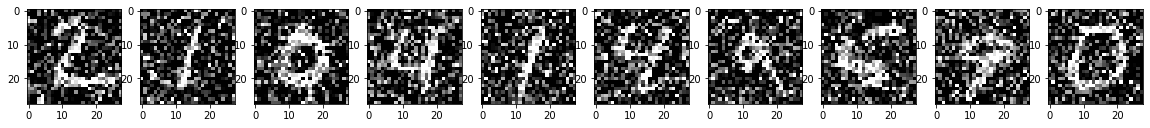

In [23]:
n = 10
plt.figure(figsize=(20,2))
for i in range(1, n+1):
  plt.subplot(1, n, i)
  plt.imshow(X_test_noisy[i].reshape(28, 28))
  plt.gray()
plt.show()

In [24]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

In [31]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
# (28, 28, 32)
x = MaxPool2D((2, 2))(x)
# (14, 14, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# (14, 14, 32)
encoded = MaxPool2D((2, 2), padding='same')(x)
#(7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
#(7, 7, 32)
x = UpSampling2D((2, 2))(x)
# (14, 14, 32)
x =Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# (14, 14, 32)
x = UpSampling2D((2, 2))(x)
# (28, 28, 32)
decoded = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)
# (28, 28, 1)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')


In [32]:
autoencoder.fit(X_train_noisy, X_train, 
                validation_data=(X_test_noisy, X_test),
                epochs = 10,
                batch_size=128,
                shuffle = True)

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1649 - val_loss: 0.1165
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1129 - val_loss: 0.1080
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1070 - val_loss: 0.1043
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1042 - val_loss: 0.1025
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1023 - val_loss: 0.1006
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1010 - val_loss: 0.0999
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1000 - val_loss: 0.0987
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0992 - val_loss: 0.0982
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0985 - val_loss: 0.0978
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0980 - val_loss: 0.0972

In [33]:
de_noised_images = autoencoder.predict(X_test_noisy[:10])

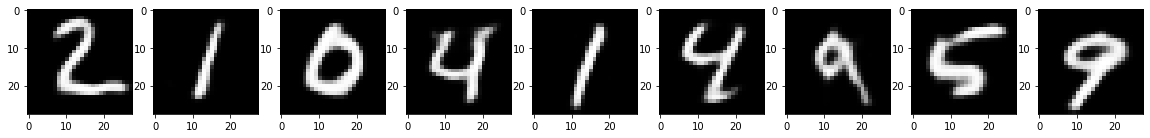

In [34]:
n = 9
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
  plt.subplot(1, n, i)
  plt.imshow(de_noised_images[i].reshape(28, 28))
  plt.gray()
plt.show()

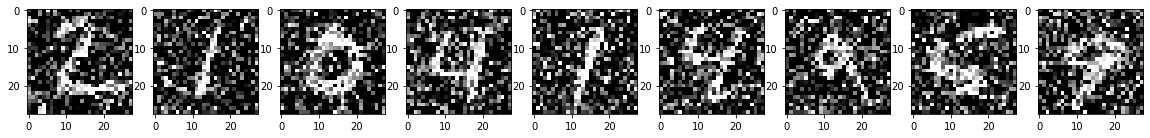

In [36]:
n = 9
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
  plt.subplot(1, n, i)
  plt.imshow(X_test_noisy[i].reshape(28, 28))
  plt.gray()
plt.show()